In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from HarrisDetector import Harris

In [41]:
# Carregando as imagens
image1 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista02/CV_Lista02_dados/goi1.jpg')
image2 = cv2.imread('C:/Users/Isabelle/Desktop/computervision/Listas_e_dados/Listas_e_dados/CV_Lista02/CV_Lista02_dados/goi2.jpg')


k = 0.04
wd = 5
threshold = 0.05

_, keypoints1 = Harris(image1, k,wd, threshold)
_, keypoints2 = Harris(image2, k,wd, threshold)

In [49]:

# Tamanho da janela ao redor do ponto característico (ímpar)

window_size = 3

# Inicializando lista para armazenar correspondências
# exemplo: [[keypoint1, keypoint1_match], [keypoint2, keypoint2_match]]

matches = []

windows1 = [cv2.getRectSubPix(image1, (window_size, window_size), (int(x),int(y))) for x,y in keypoints1]
windows2 = [cv2.getRectSubPix(image2, (window_size, window_size), (int(x),int(y))) for x,y in keypoints2]

# Iterando sobre os keypoints para calcular a métrica de SSD
# o que eu quero fazer é: para o primeiro keypoint, calcular todas as SSD com os keypoints
# da imagem 2, aplicar as condições e escolher o best_match
# daí faço a mesma coisa para o segundo
# e até o último keypoint da imagem 1

M = np.zeros([len(keypoints1),len(keypoints2)])
for idx1, kp1 in enumerate(keypoints1):
    for idx2, kp2 in enumerate(keypoints2):
        ssd = np.sum(np.abs(windows1[idx1] - windows2[idx2])**2)
        M[idx1,idx2] = ssd

M

array([[   0.,    0.,    0., ...,    0.,    0., 3690.],
       [   0.,    0.,    0., ...,    0.,    0., 3690.],
       [   0.,    0.,    0., ...,    0.,    0., 3690.],
       ...,
       [2355., 2355., 2355., ..., 2355., 2355., 1443.],
       [2493., 2493., 2493., ..., 2493., 2493., 1089.],
       [2799., 2799., 2799., ..., 2799., 2799.,  495.]])

C:\Users\Isabelle\AppData\Local\Temp\ipykernel_5668\684452792.py:10: RuntimeWarning: invalid value encountered in scalar divide
  if ssd[idx2[0]] < Tssd and ssd[idx2[0]]/ssd[idx2[1]] < Trssd:
C:\Users\Isabelle\AppData\Local\Temp\ipykernel_5668\684452792.py:17: RuntimeWarning: invalid value encountered in scalar divide
  if ssd[idx1[0]] < Tssd and ssd[idx1[0]]/ssd[idx1[1]] < Trssd:


147


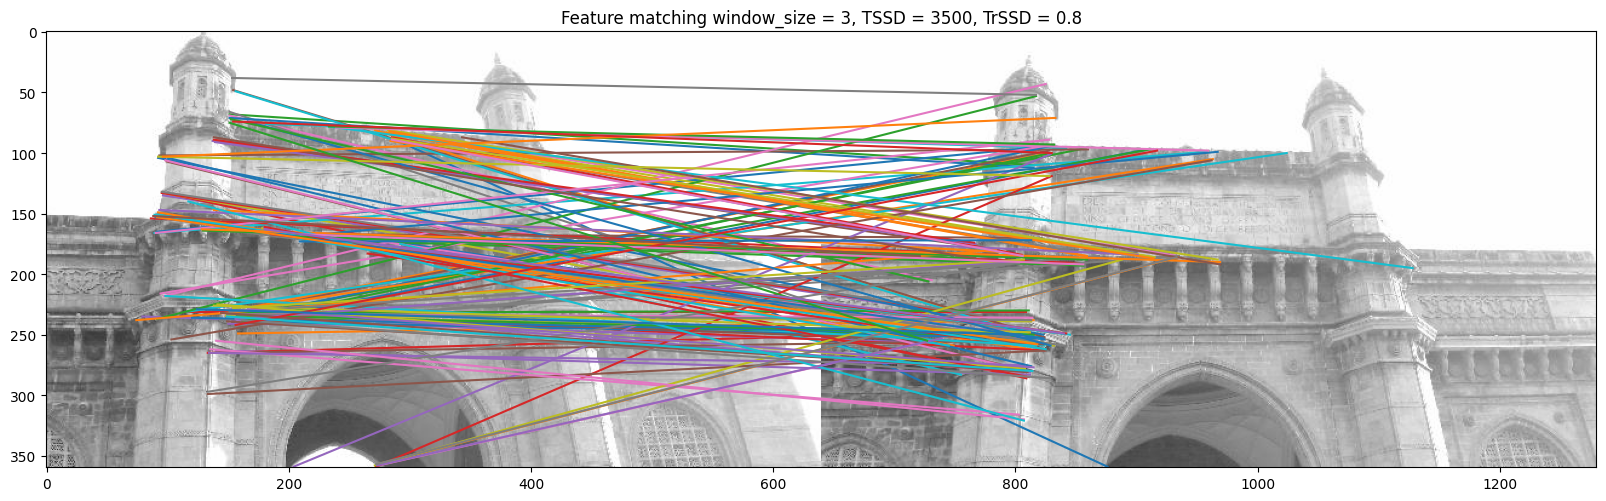

In [53]:
Tssd = 3500
Trssd = 0.8

matches_12 = []

# ssd linha dos ssds 

for idx1, ssd in enumerate(M):
    idx2 = np.argsort(ssd)
    if ssd[idx2[0]] < Tssd and ssd[idx2[0]]/ssd[idx2[1]] < Trssd:
        matches_12.append((idx1,idx2[0]))
    
matches_21 = []

for idx2, ssd in enumerate(M.T):
    idx1 = np.argsort(ssd)
    if ssd[idx1[0]] < Tssd and ssd[idx1[0]]/ssd[idx1[1]] < Trssd:
        matches_21.append((idx1[0],idx2))

matches = set(matches_12).intersection(matches_21)

print(len(matches))

imgcat = np.concatenate([image1, image2],axis=1)
plt.figure(figsize = (20,6))
plt.title(f'Feature matching window_size = {window_size}, TSSD = {Tssd}, TrSSD = {Trssd}')
plt.imshow(imgcat)

for idx1,idx2 in matches:
    coord1 = keypoints1[idx1]
    coord2 = keypoints2[idx2] + (0,640)
    plt.plot([coord1[1],coord2[1]],[coord1[0],coord2[0]])